In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# DB Connection
DB_USER = "root"
DB_PASS = "Birth2011!"
DB_HOST = "localhost"
DB_NAME = "TodoDB"

engine = create_engine(f"mysql+pymysql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}")

# Load data
df = pd.read_sql("SELECT * FROM personal_todo", con=engine)


Total Tasks: 300


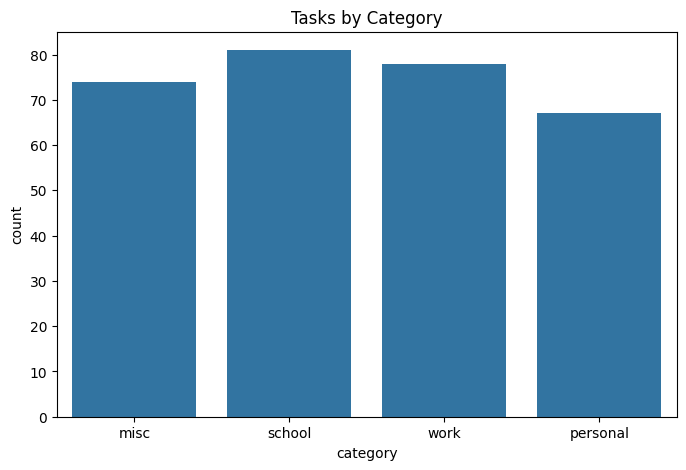

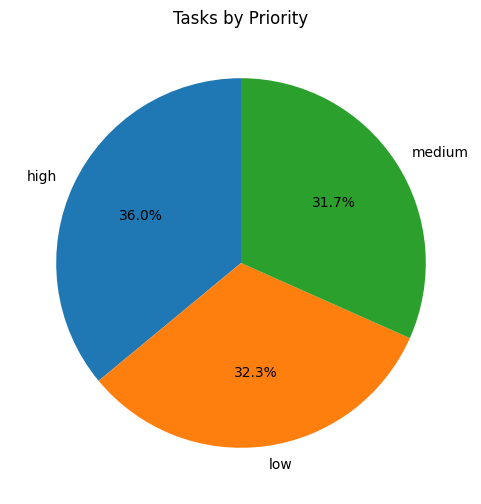

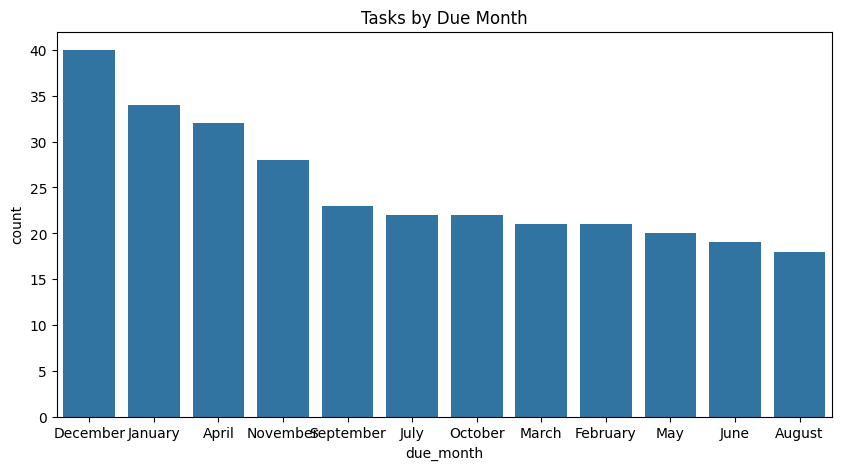

Average Tasks per Month: 25.00


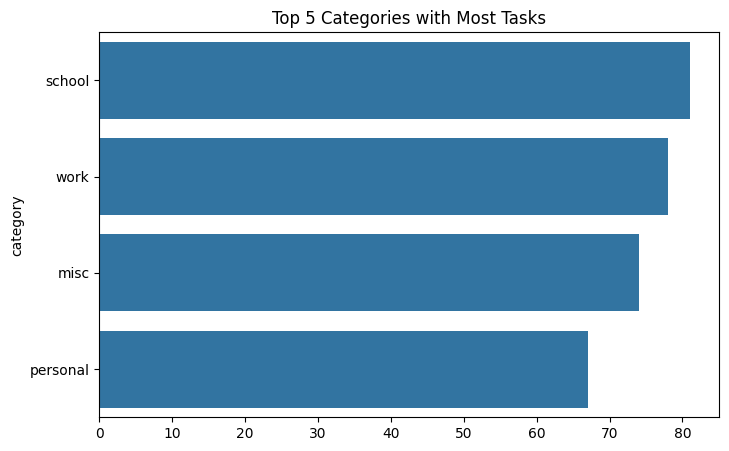

In [2]:
# ====== 1. Total tasks ======
total_tasks = len(df)
print(f"Total Tasks: {total_tasks}")

# ====== 2. Tasks by category ======
plt.figure(figsize=(8,5))
sns.countplot(x='category', data=df)
plt.title("Tasks by Category")
plt.show()

# ====== 3. Tasks by priority ======
plt.figure(figsize=(6,6))
df['priority'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Tasks by Priority")
plt.ylabel("")
plt.show()

# ====== 4. Tasks by due month ======
plt.figure(figsize=(10,5))
sns.countplot(x='due_month', data=df, order=df['due_month'].value_counts().index)
plt.title("Tasks by Due Month")
plt.show()

# ====== 5. Completed vs Pending ======
if 'status' in df.columns:
    plt.figure(figsize=(6,6))
    df['status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title("Completed vs Pending Tasks")
    plt.ylabel("")
    plt.show()

# ====== 6. Average tasks per month ======
tasks_per_month = df.groupby('due_month').size().mean()
print(f"Average Tasks per Month: {tasks_per_month:.2f}")

# ====== 7. Top categories with most tasks ======
top_categories = df['category'].value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 5 Categories with Most Tasks")
plt.show()